In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data
user_balance = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'])
user_balance

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [3]:
user_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              int64         
 1   report_date          datetime64[ns]
 2   tBalance             int64         
 3   yBalance             int64         
 4   total_purchase_amt   int64         
 5   direct_purchase_amt  int64         
 6   purchase_bal_amt     int64         
 7   purchase_bank_amt    int64         
 8   total_redeem_amt     int64         
 9   consume_amt          int64         
 10  transfer_amt         int64         
 11  tftobal_amt          int64         
 12  tftocard_amt         int64         
 13  share_amt            int64         
 14  category1            float64       
 15  category2            float64       
 16  category3            float64       
 17  category4            float64       
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 390.

In [4]:
total_balance = user_balance.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
total_balance 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [5]:
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]

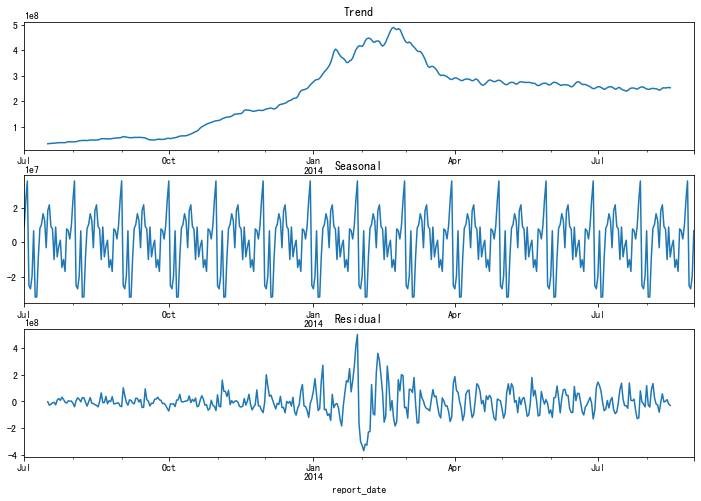

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# 对指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分：trend，seasonal, residual
    result = sm.tsa.seasonal_decompose(data, period=30)
    
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
    
plot_stl(purchase.total_purchase_amt)

([<matplotlib.axis.XTick at 0x7fad4ee5e890>,
 <a list of 37 Text xticklabel objects>)

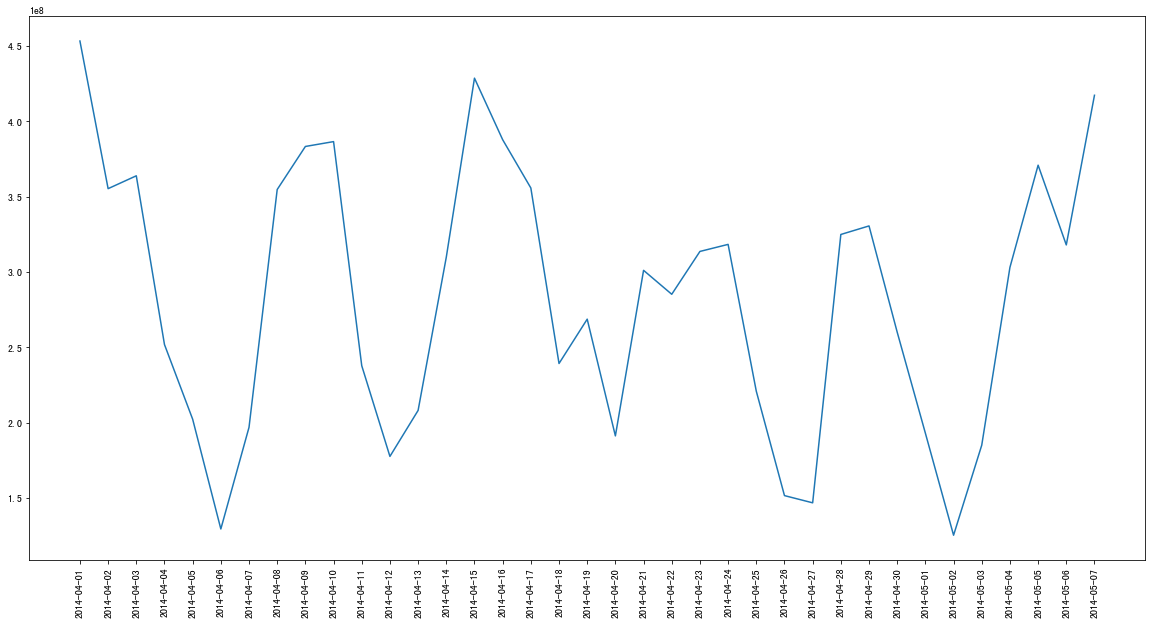

In [15]:
purchase_2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-05-07')]
# 画出走势图
plt.figure(figsize=(20,10))
plt.plot(purchase_2.total_purchase_amt)
data_range = pd.date_range('2014-04-01', '2014-05-07')
plt.xticks(data_range, rotation=90)

In [17]:
# 数据平稳性
from statsmodels.tsa.stattools import adfuller
t = adfuller(purchase['total_purchase_amt'])
t

# 不能拒绝原假设（不平稳）
# 进行一节差分
diff1 = purchase.diff(1)
t = adfuller(diff1[1:])
t

(-7.947102224652343,
 3.198186862488185e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [20]:
# 数据平稳性

t = adfuller(redeem['total_redeem_amt'])
t

# 不能拒绝原假设（不平稳）
# 进行一节差分
diff1 = redeem.diff(1)
t = adfuller(diff1[1:])
t

(-11.69198690696884,
 1.6443717458497645e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# p, d, q 其中d=1
model = ARIMA(purchase, order=(7,1,5)).fit()
purchase_pred = model.predict('2014-09-01', '2014-09-30', typ='levels')
purchase_pred

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2014-09-01    3.310539e+08
2014-09-02    3.318762e+08
2014-09-03    3.338910e+08
2014-09-04    2.983191e+08
2014-09-05    2.407509e+08
2014-09-06    2.266140e+08
2014-09-07    2.435554e+08
2014-09-08    2.970865e+08
2014-09-09    3.321274e+08
2014-09-10    3.265197e+08
2014-09-11    2.916841e+08
2014-09-12    2.392702e+08
2014-09-13    2.253550e+08
2014-09-14    2.475289e+08
2014-09-15    2.950936e+08
2014-09-16    3.345010e+08
2014-09-17    3.280818e+08
2014-09-18    2.927099e+08
2014-09-19    2.448967e+08
2014-09-20    2.275711e+08
2014-09-21    2.530230e+08
2014-09-22    2.980719e+08
2014-09-23    3.366748e+08
2014-09-24    3.321948e+08
2014-09-25    2.947106e+08
2014-09-26    2.505384e+08
2014-09-27    2.318269e+08
2014-09-28    2.574471e+08
2014-09-29    3.025702e+08
2014-09-30    3.387019e+08
Freq: D, dtype: float64

In [24]:
model.aic

16669.646033929606

In [23]:
# p, d, q 其中d=1
model2 = ARIMA(redeem, order=(7,1,5)).fit()
redeem_pred = model2.predict('2014-09-01', '2014-09-30', typ='levels')
redeem_pred

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-09-01    3.169090e+08
2014-09-02    3.372455e+08
2014-09-03    3.632442e+08
2014-09-04    3.074694e+08
2014-09-05    2.628057e+08
2014-09-06    2.258706e+08
2014-09-07    2.592158e+08
2014-09-08    3.115468e+08
2014-09-09    3.477437e+08
2014-09-10    3.562431e+08
2014-09-11    3.092719e+08
2014-09-12    2.598512e+08
2014-09-13    2.339112e+08
2014-09-14    2.578186e+08
2014-09-15    3.125493e+08
2014-09-16    3.537239e+08
2014-09-17    3.573622e+08
2014-09-18    3.146179e+08
2014-09-19    2.626592e+08
2014-09-20    2.387440e+08
2014-09-21    2.616172e+08
2014-09-22    3.157165e+08
2014-09-23    3.588117e+08
2014-09-24    3.611535e+08
2014-09-25    3.197931e+08
2014-09-26    2.672031e+08
2014-09-27    2.432839e+08
2014-09-28    2.661170e+08
2014-09-29    3.197114e+08
2014-09-30    3.635485e+08
Freq: D, dtype: float64

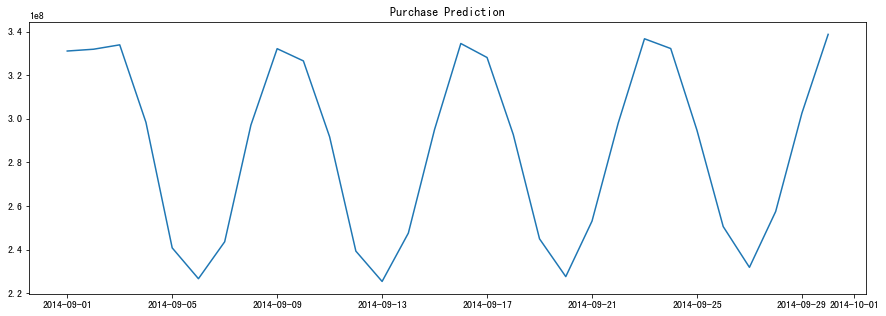

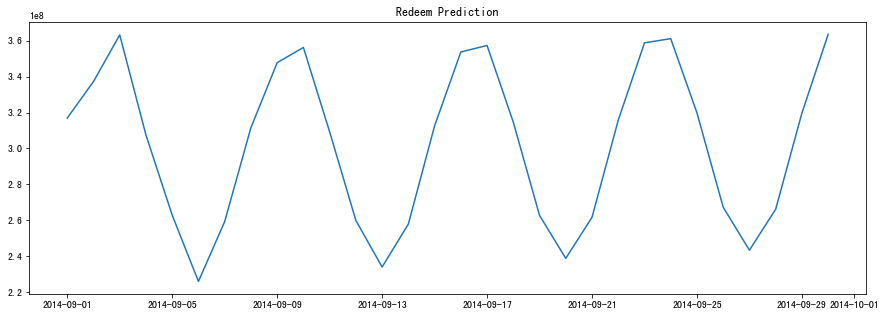

In [25]:
plt.figure(figsize=(15,5))
plt.title('Purchase Prediction')
plt.plot(purchase_pred)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Redeem Prediction')
plt.plot(redeem_pred)
plt.show()

In [27]:
result = pd.DataFrame()
result['date'] = purchase_pred.index
result['purchase'] = purchase_pred.values
result['redeem'] = redeem_pred.values
result['date'] = result['date'].apply(lambda x: str(x).replace('-', '')[:8])
result

,date,purchase,redeem
0,20140901,3.310539e+08,3.169090e+08
1,20140902,3.318762e+08,3.372455e+08
2,20140903,3.338910e+08,3.632442e+08
3,20140904,2.983191e+08,3.074694e+08
4,20140905,2.407509e+08,2.628057e+08
5,20140906,2.266140e+08,2.258706e+08
6,20140907,2.435554e+08,2.592158e+08
7,20140908,2.970865e+08,3.115468e+08
8,20140909,3.321274e+08,3.477437e+08
9,20140910,3.265197e+08,3.562431e+08


In [ ]:
result.to_csv('arima.csv', header=None, index=False)